# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:190%; text-align:center; border-radius:10px 10px;">Decision Trees Classification: Penguins Data</p>

<div class="alert alert-block alert-success">
    
## <span style=" color:#eb346e">Introduction

* Decision Trees (DTs) are a non-parametric **supervised learning method used for classification and regression**.
* Fundamentally, DTs and other tree based methods rely on the ability to **split data based on information from features**.

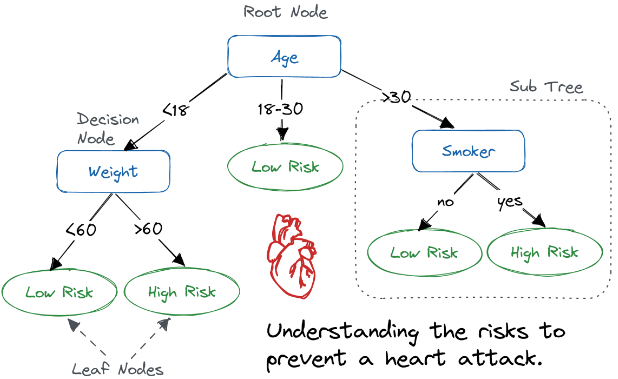

### Entropy and Information Gain

* **Entropy** measures the impurity of the sample values. Entropy values can fall between 0 and 1. If all samples in data set belong to one class, then entropy will equal zero. If half of the samples are classified as one class and the other half are in another class, entropy will be at its highest at 1. In order to select the best feature to split on and find the optimal decision tree, the attribute with **the smallest amount of entropy** should be used. 
* **Information gain** represents the difference in entropy before and after a split on a given attribute. The attribute with **the highest information gain will produce the best split** as it’s doing the best job at classifying the training data according to its target classification.

### Gini Impurity
* Gini impurity is the probability of incorrectly classifying random data point in the dataset if it were labeled based on the class distribution of the dataset. Similar to entropy, if set is pure (i.e. belonging to one class), then, its impurity is zero.
* Gini impurity is a mathematical measurement of **how pure the information** in a dataset is. In regards to classification, we can think of this as a measurement of class uniformity.
* We want to **minimize the gini impurity at leaf nodes**. Minimized mipurity means that we are separating classes effectively.

#### Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.

* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

* Able to handle multi-output problems.

#### The disadvantages of decision trees include:
* **Prone to Overfitting:** Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as **pruning, setting the minimum number of samples** required at a leaf node or **setting the maximum depth of the tree** are necessary to avoid this problem. 

* **High variance estimators:** Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* **Decision tree learners create biased trees if some classes dominate.** It is therefore recommended to **balance the dataset prior to fitting** with the decision tree</span>.


<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">About the Dataset

In this project, we will work with the "Palmer Penguins" dataset.

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

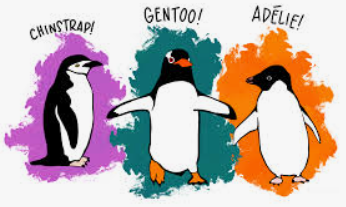

**Variables:**

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

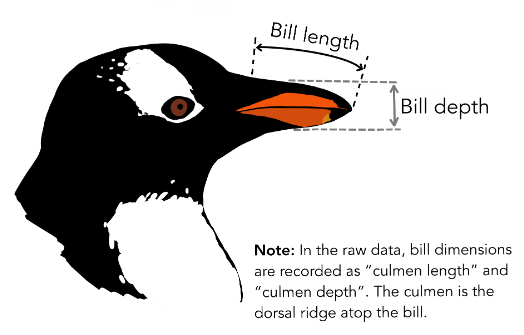

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes.**
</div>

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Feature Engineering

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Is there any null values (missing data)?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Some columns have missing values that we need to deal with. 

**How many species are there in the data? (categories in the label column)**

In [6]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

There are three species that we are going to predict based on the explaining features.

**There are 10 rowa with missing values in total. Drop these rows.**

In [7]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


Now we have 334 rows instead of 344.

### The features

In [10]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Sex column has an "." value. We can drop this row or fill in. Let's take a look at it closely.

In [12]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Explore the Gentoo species to find out its sex based on body features.

In [13]:
df[df["species"]=="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

**Replace the "." value with the appropriate sex.**

In [14]:
# use the index of this row and change the value of the sex column as FEMALE
df.at[336,"sex"] = "FEMALE"

In [15]:
# check if it is reassigned
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

### Visualization

**Display speces according to the culmen features.**

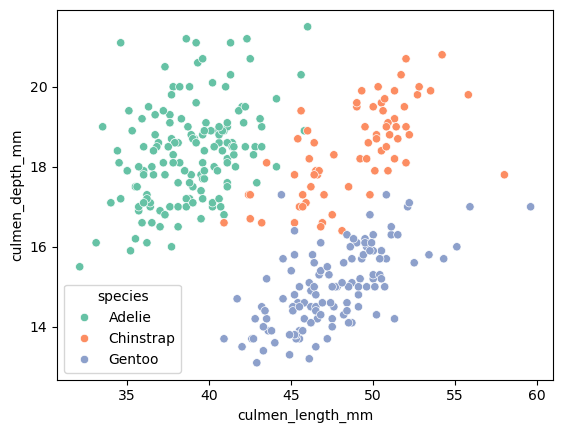

In [16]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Set2');

**Use pairplot to see the relationship between species and the features.**

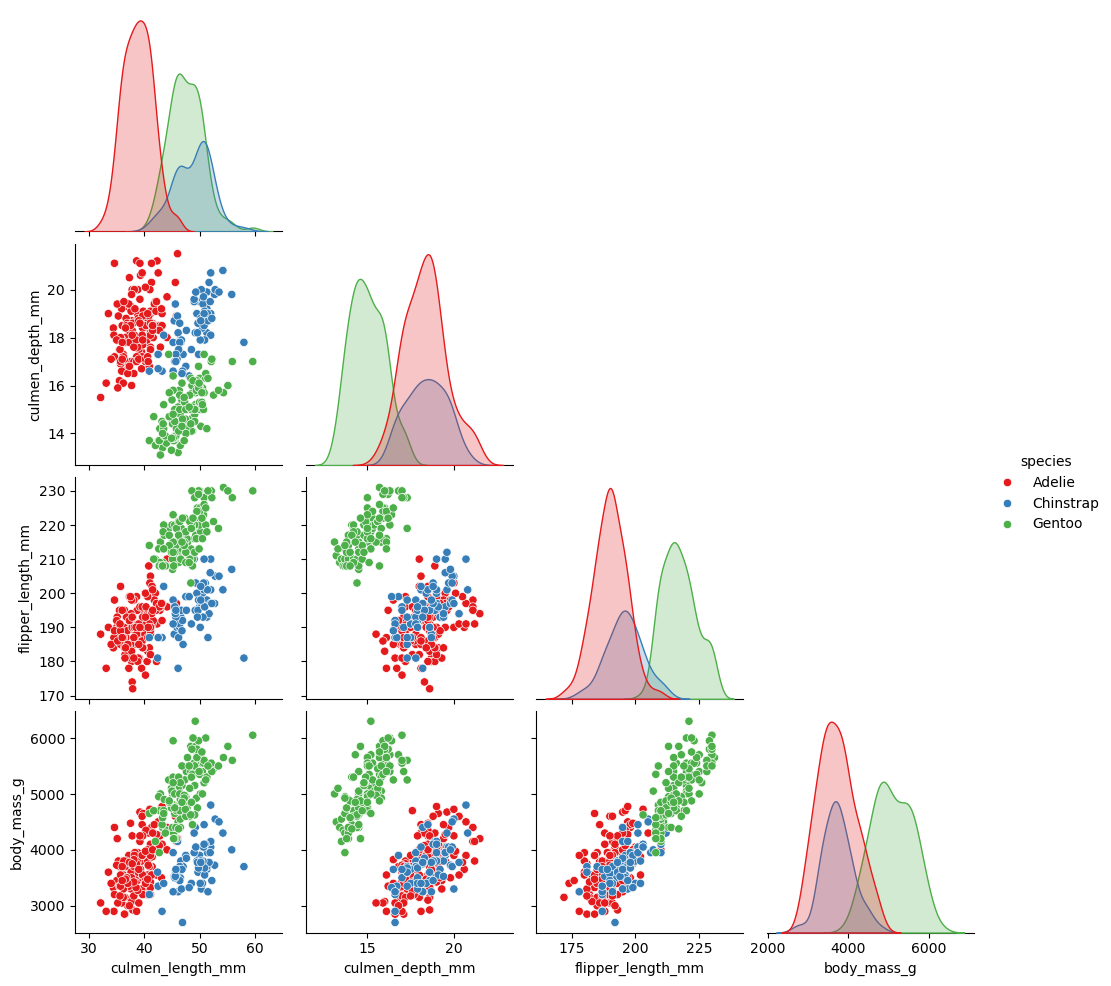

In [17]:
sns.pairplot(df, hue="species",  palette="Set1", corner=True);

**Look at the outliers.**

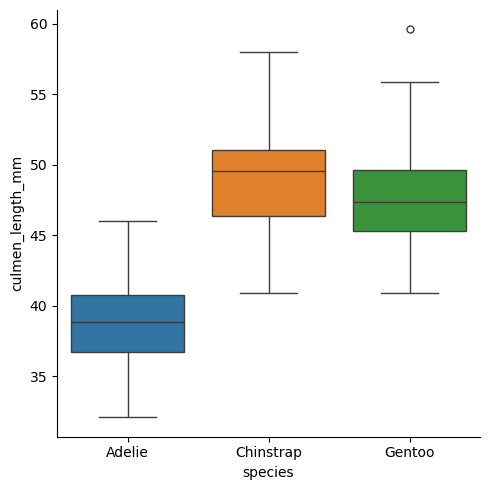

In [18]:
sns.catplot(df, x="species", y="culmen_length_mm", hue="species", kind="box");

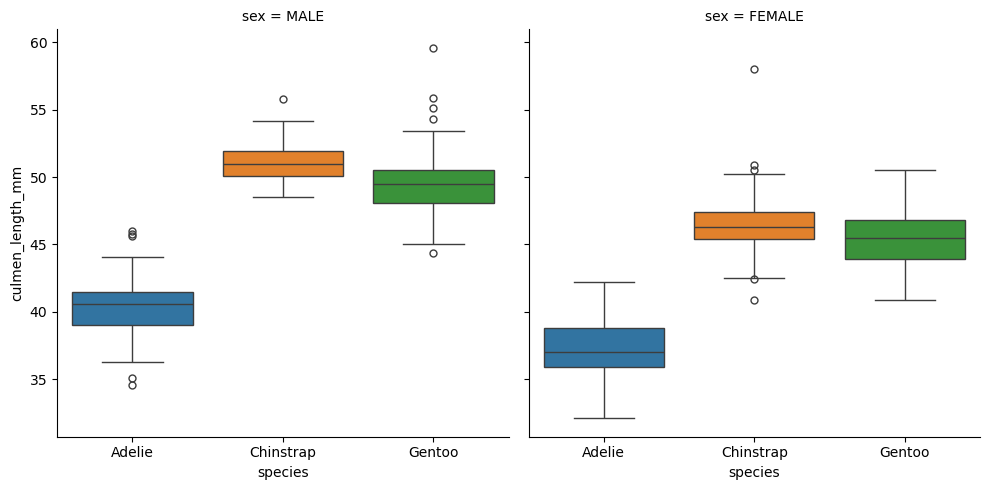

In [19]:
# Outliers based on sex
sns.catplot(df, x="species", y="culmen_length_mm", col="sex",  hue="species", kind="box");

### Get_Dummies

**Convert string island names and sex into dummy variables. Then separate the data as X and y**

In [20]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [21]:
pd.get_dummies(df.drop("species", axis=1), drop_first=True)

# Dropping target column will give us X features. 
# At the same time we will convert string columns to integer

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


By default, dummy variables are **represented as bool** (True and False).

We can specify the data type with the **dtype** argument. Since True and False are considered as 1 and 0 respectively, for example, specifying **int** will represent them as 1 and 0.

In [22]:
# use "dtype" for 0 and 1 integer values
pd.get_dummies(df.drop("species", axis=1), dtype=int, drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [23]:
# Separate data as X and y

X = pd.get_dummies(df.drop("species", axis=1), dtype=int, drop_first=True)
y = df["species"]

## Train | Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

### Default Hyperparameters

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Create the model with default parameters
model = DecisionTreeClassifier()

In [28]:
# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Prediction
base_preds = model.predict(X_test)

In [30]:
# prediction of the default model
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'

In [31]:
# True values for comaparison
y_test

202    Chinstrap
315       Gentoo
141       Adelie
200    Chinstrap
299       Gentoo
         ...    
263       Gentoo
89        Adelie
210    Chinstrap
23        Adelie
317       Gentoo
Name: species, Length: 101, dtype: object

### Evaluation

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
# Confusion Matrix
confusion_matrix(y_test,base_preds) # y_true,y_pred

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

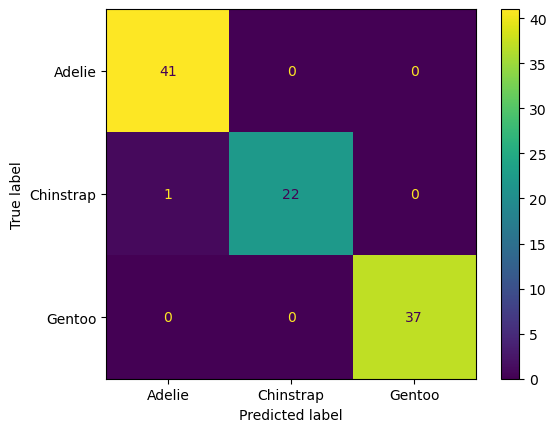

In [34]:
# Plot the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, base_preds);

There are 6 misclassifications.

In [35]:
# Classification Report
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



**Which features are important?**

In [36]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [37]:
model.feature_importances_

array([0.33609286, 0.05366774, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.01085298])

In [38]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.010853
culmen_depth_mm,0.053668
island_Dream,0.068185
culmen_length_mm,0.336093
flipper_length_mm,0.531201


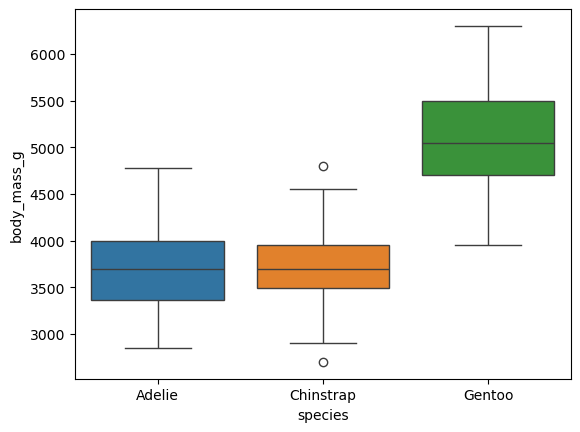

In [39]:
sns.boxplot(df, x='species',y='body_mass_g', hue="species");

## Visualize the Tree

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [40]:
from sklearn.tree import plot_tree

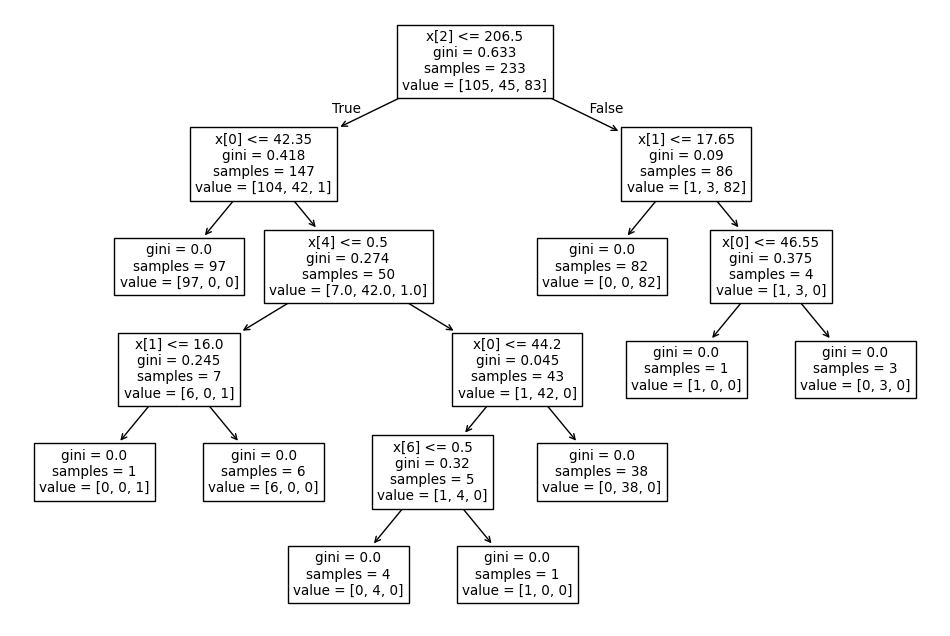

In [41]:
plt.figure(figsize=(12,8))
plot_tree(model);

<div class="alert alert-warning alert-info">
    
#### <span style=" color:#bf2e98">Explanation: 
Model starts to split categories from the feature in index 2, which is "flipper_length_mm". When we look at the feature importance table above, we see that it is indeed the most important feature. Our goal is to reduce gini impurity while gaining information. It starts from 0.633 and drops through the process. **Sample** information in the boxes represents the X_train data whereas **value** shows the categories (species for this data) in order. There are 5 level of splits. If we want to add bias to avoid overfitting, we can prune them.
</span>

**We can see the features' names.**

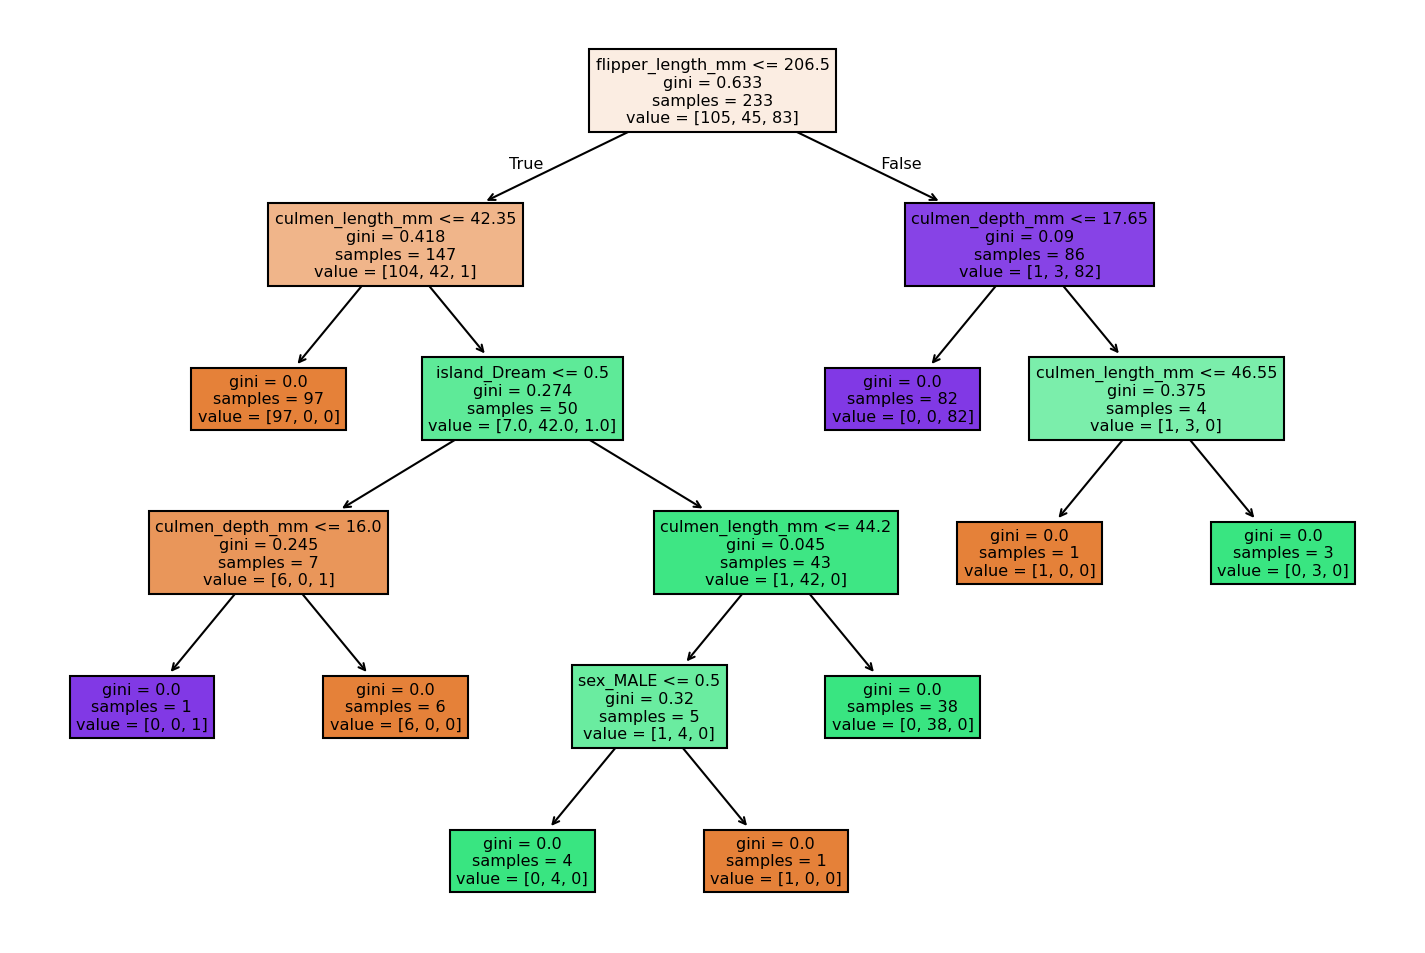

In [42]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# "filled=True" makes the shape colorful.

In [43]:
# "samples=233" is the length of the X_train data
len(X_train)

233

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [44]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)  # visualize the tree
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

In [45]:
# help(DecisionTreeClassifier)

"""
Parameters

criterion : {"gini", "entropy"}, default="gini"
The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity 
and "entropy" for the information gain.

splitter : {"best", "random"}, default="best" 
The strategy used to choose the split at each node. Supported strategies are "best" to choose 
the best split and "random" to choose the best random split.

max_depth : int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or 
until all leaves contain less than min_samples_split samples.
  
min_samples_split : int or float, default=2
The minimum number of samples required to split an internal node:
  
- If int, then consider `min_samples_split` as the minimum number.
- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum
number of samples for each split.

min_samples_leaf : int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered 
if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  
This may have the effect of smoothing the model, especially in regression.

min_weight_fraction_leaf : float, default=0.0
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
Samples have equal weight when sample_weight is not provided.
 
max_features : int, float or {"auto", "sqrt", "log2"}, default=None

"""

'\nParameters\n\ncriterion : {"gini", "entropy"}, default="gini"\nThe function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity \nand "entropy" for the information gain.\n\nsplitter : {"best", "random"}, default="best" \nThe strategy used to choose the split at each node. Supported strategies are "best" to choose \nthe best split and "random" to choose the best random split.\n\nmax_depth : int, default=None\nThe maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or \nuntil all leaves contain less than min_samples_split samples.\n  \nmin_samples_split : int or float, default=2\nThe minimum number of samples required to split an internal node:\n  \n- If int, then consider `min_samples_split` as the minimum number.\n- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum\nnumber of samples for each split.\n\nmin_samples_leaf : int or float, default=1\nThe minimum n

### Max Depth

In [46]:
# Create a new model with max_depth=2
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





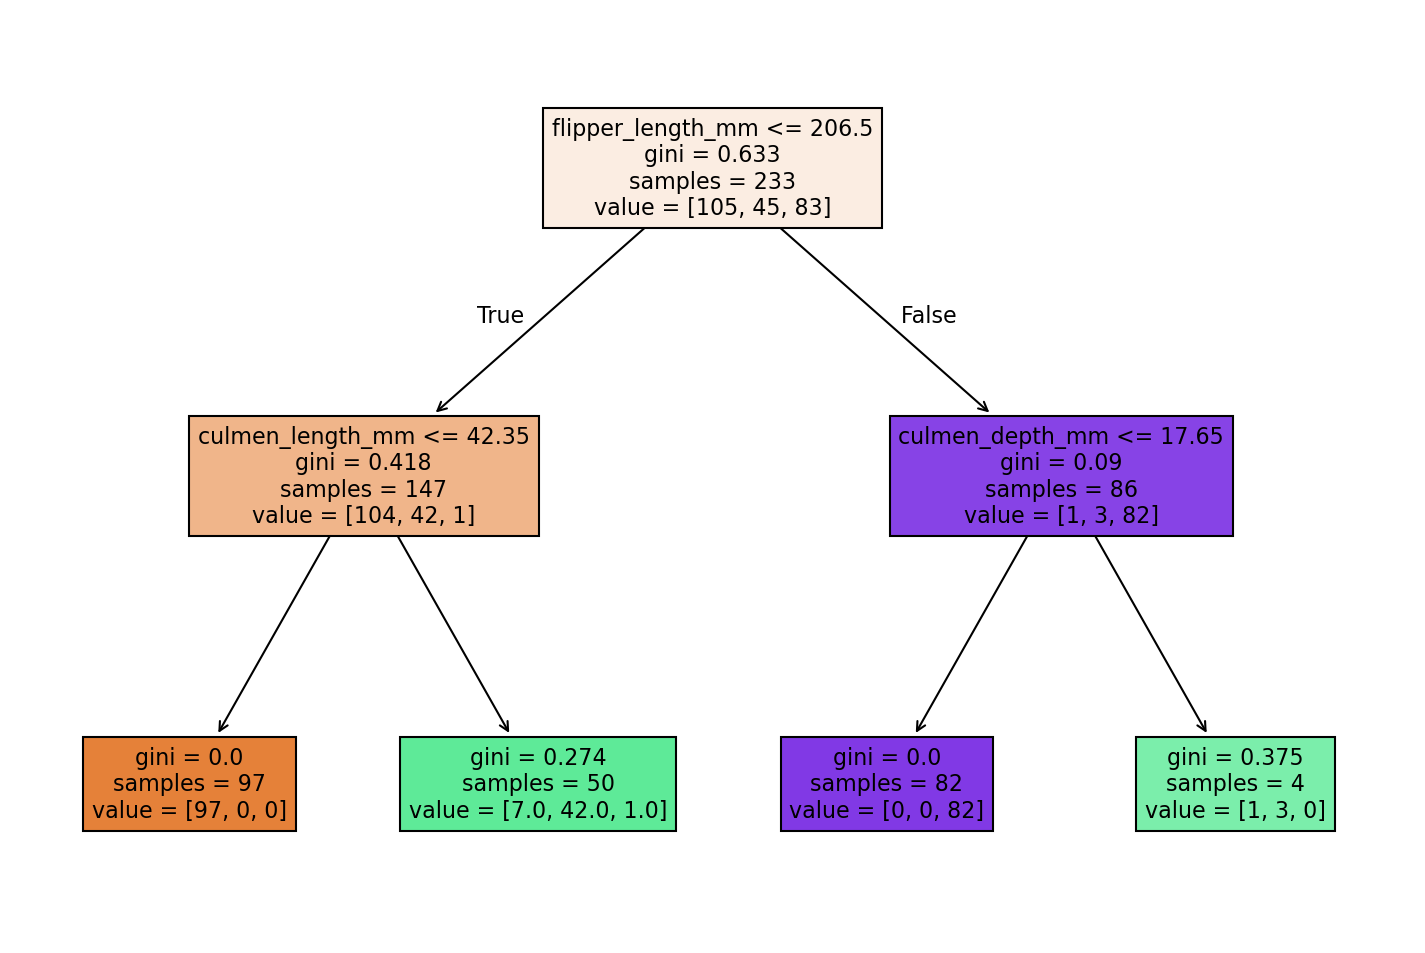

In [47]:
# Use the above "report_model" function to compare the scores and tree for the model
report_model(pruned_tree)

### Max Leaf Nodes

In [48]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3) 
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





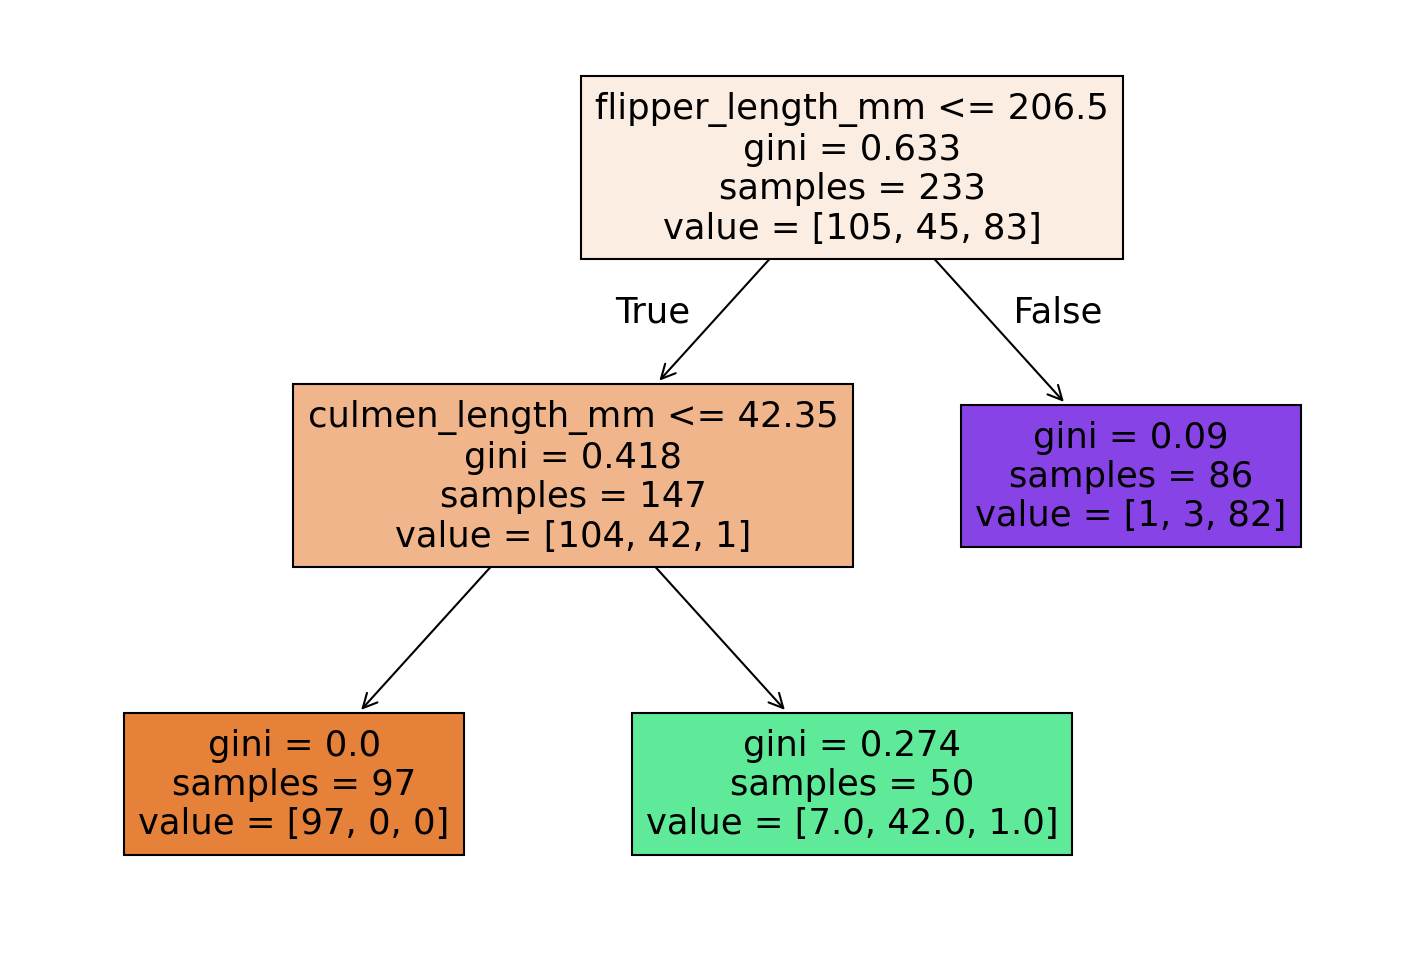

In [49]:
report_model(max_leaf_tree)

### Criterion

In [50]:
entropy_tree = DecisionTreeClassifier(criterion='entropy') # by default "gini"
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





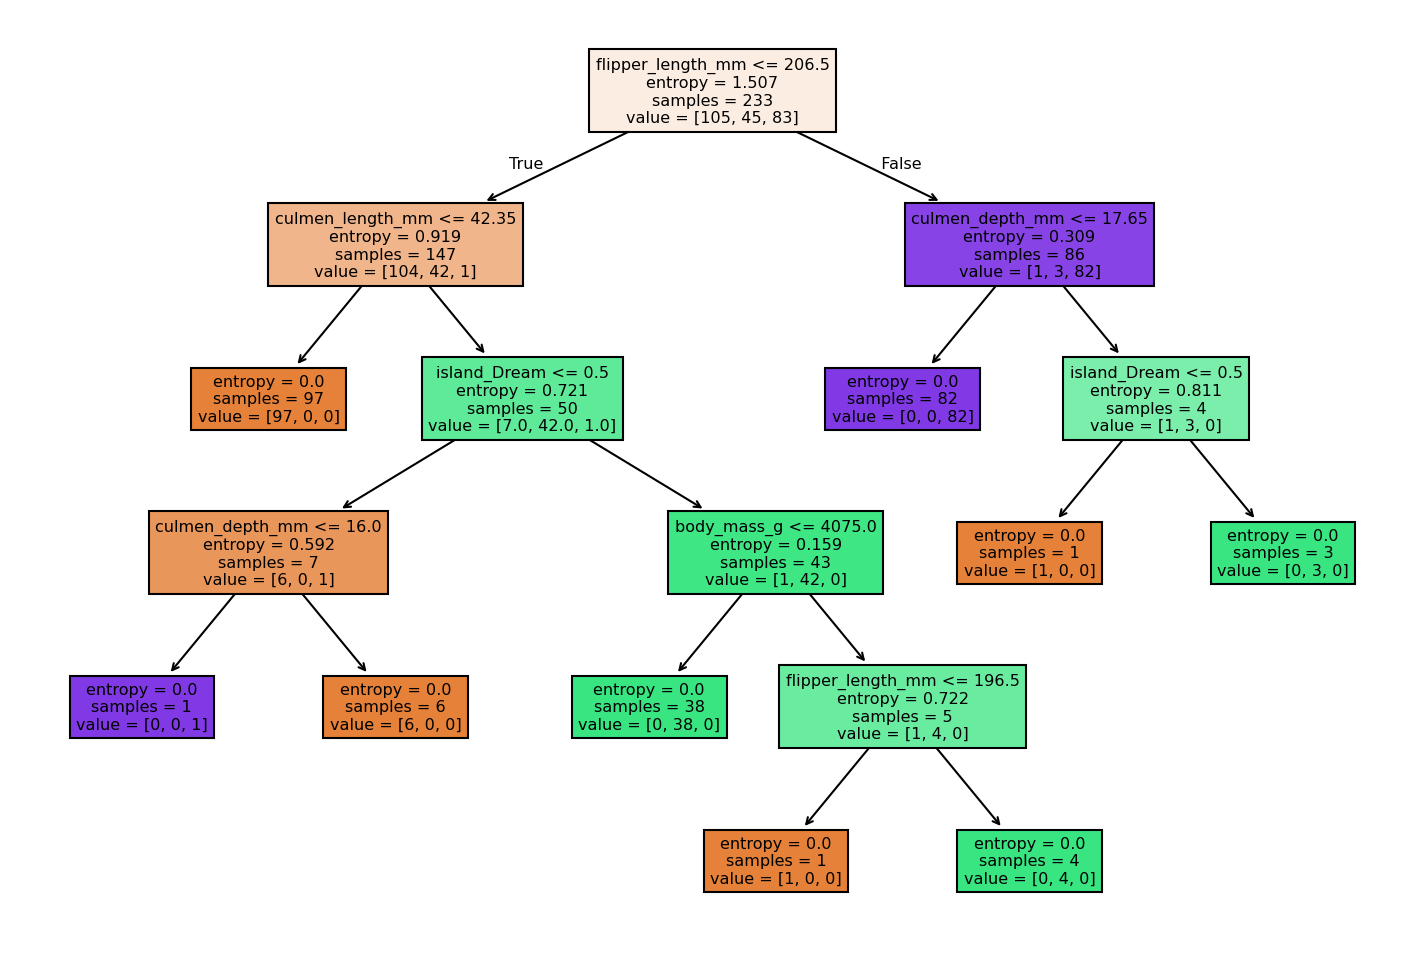

In [51]:
report_model(entropy_tree)

<div class="alert alert-warning alert-info">
<span style=" color:#bf2e98"> 

This tree is different from the previous ones created by the Gini criterion. Since we chose **entropy** in this model, leaves, branches and the chosen features in each split may change. Compared to other models, in this entropy model, the precision, recall, and F1 scores of the second class (Chinstrap) and the overall accuracy score are quite satisfactory.
</span>